In [21]:
##########QUESTÃO 1##########
%matplotlib inline
import numpy as np
import matplotlib as plt
import pandas as pd
from scipy import stats
import math
values = [0.8411, 0.8191, 0.8182, 0.8125, 0.8580, 0.8532, 0.8483, 0.8276, 0.8042, 0.8730, 0.8282, 0.8359, 0.8750, 0.7983, 0.8660]

In [24]:
df = pd.DataFrame(values)
tobs = (df.mean()-0.82)/((np.std(df,ddof=1))/((len(df))**(1/2)))
tobs

0    2.718979
dtype: float64

In [5]:
df.describe()

,0
count,15.000000
mean,0.837240
std,0.024557
min,0.798300
25%,0.818650
50%,0.835900
75%,0.855600
max,0.875000


In [32]:
p = 1- stats.t.cdf(df.mean(),df=len(df)-1, loc = 0.82, scale = np.std(df,ddof=1)/((len(df))**(1/2)))
p

array([ 0.00831337])

In [19]:
tcritico = stats.t.ppf(1-0.025, df=len(df)-1, scale = np.std(df,ddof=1)/((len(df))**(1/2)))
tcritico

array([ 0.01359927])

In [37]:
##########QUESTÃO 2##########
values = [23.01, 22.22, 22.04, 22.62, 22.59]
df = pd.DataFrame(values)
tobs = (df.mean()-22.5)/((np.std(df,ddof=1))/((len(df))**(1/2)))
p = 1- stats.t.cdf(df.mean(),df=len(df)-1, loc = 22.5, scale = np.std(df,ddof=1)/((len(df))**(1/2)))
tobs

0   -0.023642
dtype: float64

In [36]:
tcritico = stats.t.ppf(1-0.025, df=len(df)-1, scale = np.std(df,ddof=1)/((len(df))**(1/2)))
tcritico

array([ 0.46975285])

In [38]:
stats.probplot(df, dist='norm', plot=plt) 

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [8]:
##########BOOTSTRAP (QUESTÃO 3)##########
import numpy as np
import matplotlib as plt
import pandas as pd
from scipy import stats
import math

%matplotlib inline

dados = [129.26, 204.49, 116.89, 106.4 , 95.3 , 123.35, 92.3 , 300.02, 264.34, 168.27, 80.02, 117.96, 117.73, 370.47, 462.59, 92.58, 258.52, 82.59]
dados = pd.Series(dados)
n = len(dados)


In [9]:
xbarra = np.mean(dados)
dp = np.std(dados,ddof=1)

print("Média: ", xbarra)
print("Desvio padrão amostral: ", dp)

Média:  176.83777777777777
Desvio padrão amostral:  110.95287190067022


In [10]:
###PARA A MÉDIA AMOSTRAL###
n = 10
xbarra_Boot = []

B = 10000
for i in range(B):
    amostra = np.random.choice(dados, size=n, replace=True)
    xbarraB = np.mean(amostra)
    xbarra_Boot.append(xbarraB)

Limite inferior: 116.9759
Limite superior: 250.8295


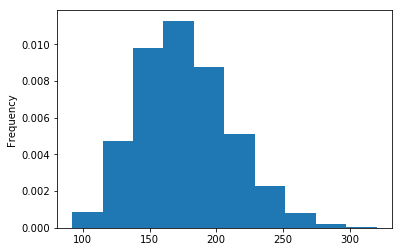

In [11]:
#Confiança = 0.95
Lim_inf = np.percentile(xbarra_Boot, 2.5)
Lim_sup = np.percentile(xbarra_Boot, 97.5)
print('Limite inferior:', Lim_inf)
print('Limite superior:', Lim_sup)
pd.Series(xbarra_Boot).plot.hist(normed=True, legend=False);

In [12]:
###PARA O DESVIO PADRÃO AMOSTRAL###
n = 10
xbarra_Boot = []

B = 10000
for i in range(B):
    amostra = np.random.choice(dados, size=n, replace=True)
    xbarraB = np.std(amostra, ddof=1)
    xbarra_Boot.append(xbarraB)

Limite inferior: 38.7855102851
Limite superior: 156.24031997


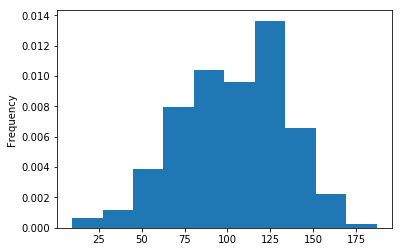

In [13]:
#Confiança = 0.95
Lim_inf = np.percentile(xbarra_Boot, 2.5)
Lim_sup = np.percentile(xbarra_Boot, 97.5)
print('Limite inferior:', Lim_inf)
print('Limite superior:', Lim_sup)
pd.Series(xbarra_Boot).plot.hist(normed=True, legend=False);